In [3]:
import tweepy
from tweepy import OAuthHandler

# Read csv file into a pandas dataframe
ACCESS_TOKEN = ''
ACCESS_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [148]:
import json
from tweepy import Stream
from tweepy.streaming import StreamListener

class MyListener(StreamListener):
    
    def on_data(self, data):
        try:
            with open('F:/promotweets.json','a') as f:
                aa = json.loads(data)
                f.write(json.dumps(aa))
                f.write('\n')
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
    
    def on_error(self, status):
        print(status)
        return True
    
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#promo','#promosi','#promote','#promotion','#diskon','#discount','#free','#sale','#murah','#cashback','#giveaway','#iklan'])

ProtocolError: ('Connection broken: IncompleteRead(7623 bytes read)', IncompleteRead(7623 bytes read))

In [137]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [5]:
#Reading the raw data collected from the Twitter Streaming API using #Tweepy. 
tweets_data = []
tweets_data_path = 'F:/promotweets.json'
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
#Banyaknya jumlah tweet dalam promotweets.json
tweets_data = [x for x in tweets_data if not isinstance(x, int)]
print("The total number of Tweets is:",len(tweets_data))

The total number of Tweets is: 2813


In [7]:
#Create a function to see if the tweet is a retweet
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True
#Create a function to see if the tweet is a reply to a tweet of #another user, if so return said user. 
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']        

In [8]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the #desired fields from the JSON. More could be added if needed.
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['hashtag'] = list(map(lambda tweet: tweet['entities']['hashtags'], tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['RT'] = list(map(is_RT, tweets_data))
tweets['Reply'] = list(map(is_Reply_to, tweets_data))

In [39]:
tweets.head()

,text,hashtag,Username,Timestamp,lenght,location,RT,Reply
0,RT @FreebiesCards: #freebies #free #giftcards ...,"[{'text': 'freebies', 'indices': [19, 28]}, {'...",FreebiesCards,Tue Aug 13 17:06:22 +0000 2019,140,United States,True,None
1,GUCCI MARMONT BAG GIVEAWAY #giveaway #gucci #v...,"[{'text': 'giveaway', 'indices': [27, 36]}, {'...",MissCarolAnnB,Tue Aug 13 17:06:23 +0000 2019,88,None,False,None
2,RT @kwonkim4sure: ---GIVE AWAY!---\nALBUM \n- ...,[],pcloeyenthus,Tue Aug 13 17:06:23 +0000 2019,144,None,True,None
3,Last chance to get your back-to-school planner...,[],KatieMettner,Tue Aug 13 17:06:25 +0000 2019,228,Wisconsin,False,None
4,RT @clubworkspace: At our last #WBIDinner we c...,"[{'text': 'WBIDinner', 'indices': [31, 41]}]",KyomiJohnson1,Tue Aug 13 17:06:26 +0000 2019,144,None,True,None


In [9]:
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 55% of all the tweets


In [158]:
RT_tweets.head()

,text,hashtag,Username,Timestamp,lenght,location,RT,Reply
0,RT @FreebiesCards: #freebies #free #giftcards ...,"[{'text': 'freebies', 'indices': [19, 28]}, {'...",FreebiesCards,Tue Aug 13 17:06:22 +0000 2019,140,United States,True,None
2,RT @kwonkim4sure: ---GIVE AWAY!---\nALBUM \n- ...,[],pcloeyenthus,Tue Aug 13 17:06:23 +0000 2019,144,None,True,None
4,RT @clubworkspace: At our last #WBIDinner we c...,"[{'text': 'WBIDinner', 'indices': [31, 41]}]",KyomiJohnson1,Tue Aug 13 17:06:26 +0000 2019,144,None,True,None
8,RT @kiraysoff: #CONCOURS Écran 144Hz Predator ...,"[{'text': 'CONCOURS', 'indices': [15, 24]}, {'...",Imlukaa1,Tue Aug 13 17:06:32 +0000 2019,139,None,True,None
9,RT @KerozeNYT: [#CONCOURS] [#GIVEAWAY] [3 GAGN...,"[{'text': 'CONCOURS', 'indices': [16, 25]}, {'...",KloseBarcelona,Tue Aug 13 17:06:33 +0000 2019,140,España,True,None


In [10]:
#See the percentage of tweets from the initial set that are replies #to tweets of another user:
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of reply tweets is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of reply tweets is 3% of all the tweets


In [160]:
Reply_tweets.head()

,text,hashtag,Username,Timestamp,lenght,location,RT,Reply
47,@RamagyaInstitu1 A)1911 #win #contestindia #f...,"[{'text': 'win', 'indices': [24, 28]}, {'text'...",pari0275,Tue Aug 13 17:06:55 +0000 2019,125,"Dahisar East, Mumbai",False,RamagyaInstitu1
106,@AnythingGoesL @whittarduk #AGLComp #Tea #win ...,"[{'text': 'AGLComp', 'indices': [27, 35]}, {'t...",lorinda_connor,Tue Aug 13 17:07:40 +0000 2019,55,None,False,AnythingGoesL
146,@AvantiKB Fabulous! #win #free #freebie #frida...,"[{'text': 'win', 'indices': [20, 24]}, {'text'...",jenrhymer,Tue Aug 13 17:08:13 +0000 2019,140,Somerset,False,AvantiKB
196,@AqualiteIndia #DifferentSaBond @industweets ...,"[{'text': 'DifferentSaBond', 'indices': [16, 3...",AartiVy,Tue Aug 13 17:08:48 +0000 2019,94,None,False,AqualiteIndia
198,@RABTBookTours #Win a eBook Copy or GC from Je...,"[{'text': 'Win', 'indices': [15, 19]}, {'text'...",hej19,Tue Aug 13 17:08:49 +0000 2019,138,None,False,RABTBookTours


In [11]:
#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets = tweets[~tweets['text'].str.contains("RT")  & tweets['text'].str.contains("@")]
print(f"The percentage of mention tweets is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of mention tweets is 18% of all the tweets


In [162]:
mention_tweets.head()

,text,hashtag,Username,Timestamp,lenght,location,RT,Reply
3,Last chance to get your back-to-school planner...,[],KatieMettner,Tue Aug 13 17:06:25 +0000 2019,228,Wisconsin,False,None
6,"This #TriviaTuesday, comment your guess and sc...","[{'text': 'TriviaTuesday', 'indices': [5, 19]}...",LaughlinLibrary,Tue Aug 13 17:06:29 +0000 2019,237,"Ambridge, PA",False,None
11,"Thats right, thats right, thats right, thats r...","[{'text': 'Tigerskin', 'indices': [83, 93]}]",racingtelegraph,Tue Aug 13 17:06:33 +0000 2019,227,NEWMARKET,False,None
18,You can win $MATIC worth of $300 for trying ou...,"[{'text': 'decentralized', 'indices': [48, 62]...",LPSG9,Tue Aug 13 17:06:40 +0000 2019,242,"New York, NY",False,None
22,#WIN the Ultimate #Outlander! #amreading #give...,"[{'text': 'WIN', 'indices': [0, 4]}, {'text': ...",afraser74,Tue Aug 13 17:06:42 +0000 2019,94,None,False,None


In [12]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of No RT or mention is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of No RT or mention is 25% of all the tweets


In [164]:
plain_text_tweets.head()

,text,hashtag,Username,Timestamp,lenght,location,RT,Reply
1,GUCCI MARMONT BAG GIVEAWAY #giveaway #gucci #v...,"[{'text': 'giveaway', 'indices': [27, 36]}, {'...",MissCarolAnnB,Tue Aug 13 17:06:23 +0000 2019,88,None,False,None
5,I entered to win an Astro Pneumatic Digital Ti...,"[{'text': 'giveaway', 'indices': [98, 107]}, {...",d_prine,Tue Aug 13 17:06:29 +0000 2019,136,north central Arkansas,False,None
7,Time Life CMA Awards Live 10 Disc DVD Set #Giv...,"[{'text': 'Giveaway', 'indices': [42, 51]}]",AnnMB608,Tue Aug 13 17:06:31 +0000 2019,88,United States,False,None
13,Win A Trip To The Japanese Grand Prix #Japanes...,"[{'text': 'JapaneseGrandPrix', 'indices': [38,...",GVacationDeals,Tue Aug 13 17:06:35 +0000 2019,242,None,False,None
17,Yes,[],BSonkiewicz,Tue Aug 13 17:06:39 +0000 2019,3,None,False,None


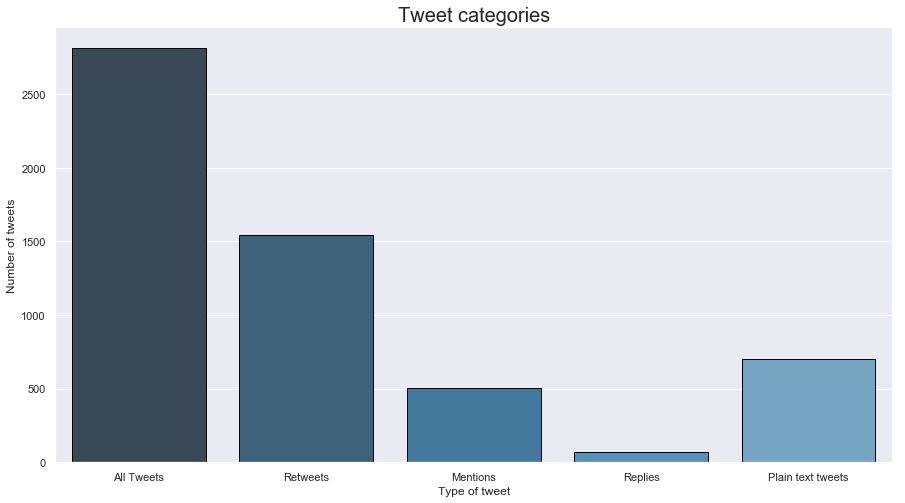

In [13]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.set_palette("Blues_d")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [14]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [15]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list = sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]

#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []

#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

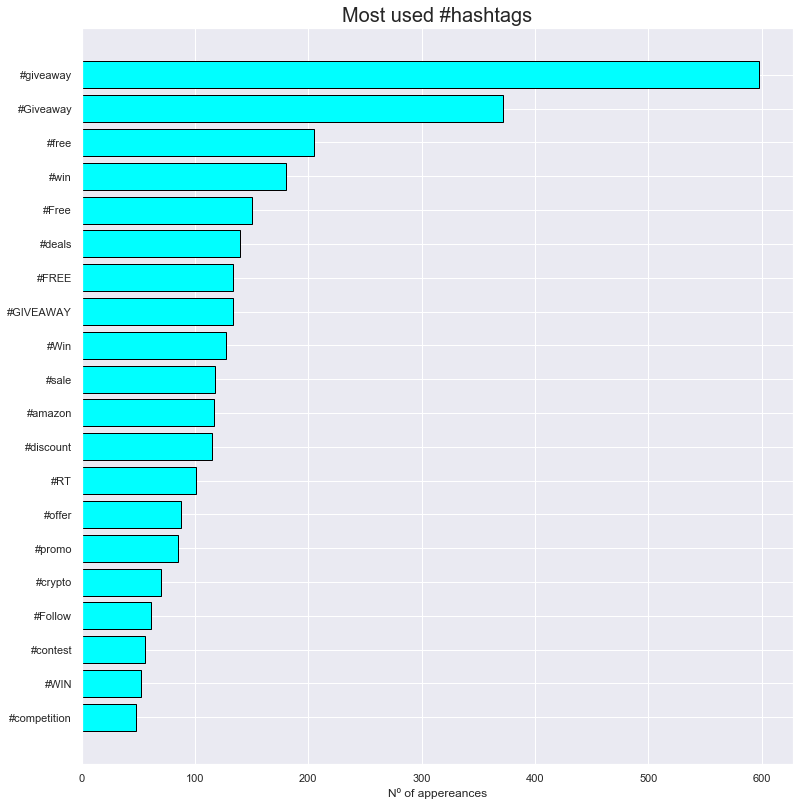

In [168]:
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)

plt.show()

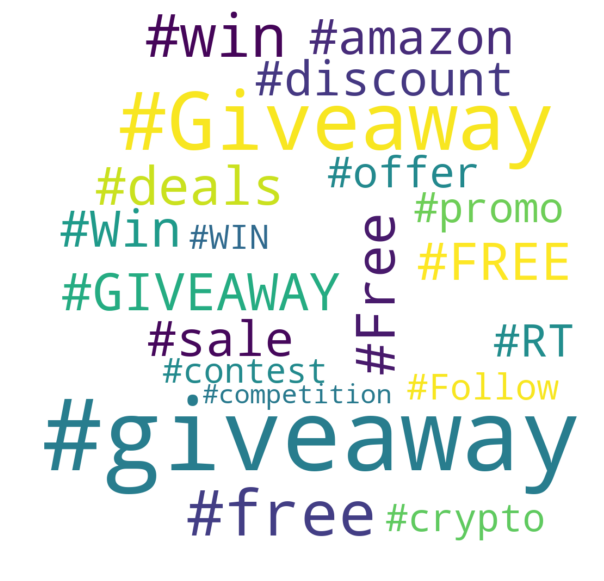

In [169]:
#Make a wordcloud plot of the most used hashtags, for this we need a dictionary 
#where the keys are the words and the values are the number of appearances

hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [20]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(tweets['text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [21]:
#Create an ordered list of tuples with the most mentioned users and 
#the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous 
#list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

In [22]:
#mentions_ordered_keys

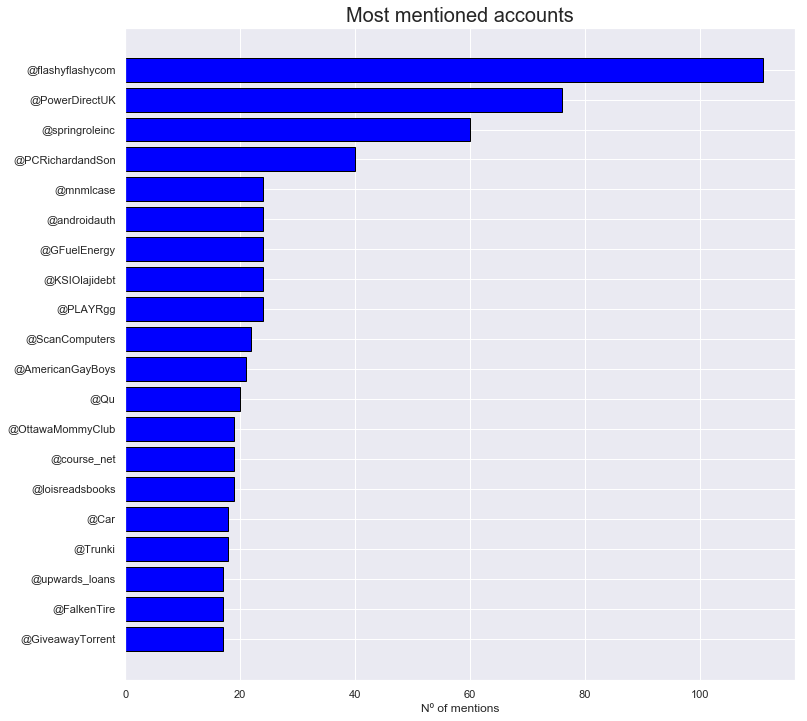

In [23]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'blue', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

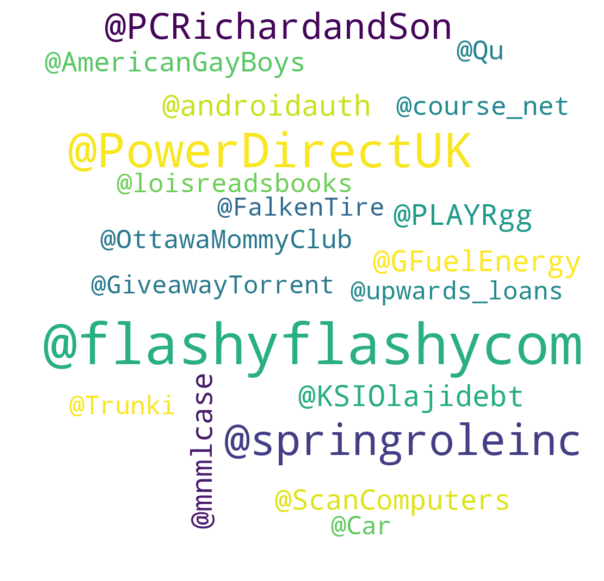

In [174]:
#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()